In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
msgw_path = r'E:\XMU\231002_reproduce\preprocess_data\mgwr\MGWR_session_results.csv'
patch_info = r'E:\XMU\231002_reproduce\preprocess_data\continual_data.xlsx'
msgw_data = pd.read_csv(msgw_path)
pacth_data = pd.read_excel(patch_info)


In [5]:
msgw_data['year'] = pacth_data['year']

<AxesSubplot:xlabel='year'>

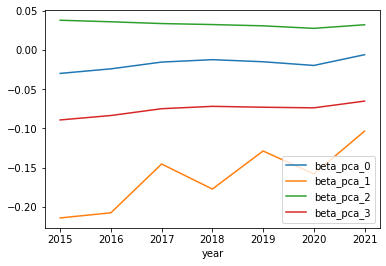

In [7]:
select_feature = ['beta_pca_0', 'beta_pca_1', 'beta_pca_2', 'beta_pca_3']
msgw_data.groupby('year')[select_feature].mean().plot()

In [3]:
pos_path = r'E:\XMU\231002_reproduce\raw_data\result_pos.csv'
size_path = r'E:\XMU\231002_reproduce\raw_data\result_size.csv'
pos = pd.read_csv(pos_path)
size = pd.read_csv(size_path)
cols = pos.columns.tolist()
size_cols = size.columns.tolist()

In [9]:
name = size_cols[1:]
new_name = []
for i in name:
    new_name.append(i+'x')
    new_name.append(i+'y')
pos.columns = pos.columns.tolist()[:1]+new_name

In [11]:
pos.to_csv(r'E:\XMU\231002_reproduce\raw_data\result_pos.csv',index=False)

In [2]:
import netCDF4 as nc
import pandas as pd
from glob import glob
import os

In [3]:
father_path = r'E:\XMU\231002_reproduce\weather_data'
data_path = sorted(glob(os.path.join(father_path,'2*','*.nc')))

In [6]:
for file in data_path:
    data = nc.Dataset(file)
    print(data.variables.keys())
    break

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\XMU\\231002_reproduce\\weather_data\\2014\\data.nc'

In [2]:
size_path = r'E:\XMU\231002_reproduce\raw_data\result_size.csv'
size_total_path = r'E:\XMU\231002_reproduce\raw_data\result_size1229.csv'
size = pd.read_csv(size_path)
size_total = pd.read_csv(size_total_path)

In [4]:
size.replace(-1, np.nan, inplace=True)
size_total.replace(-1, np.nan, inplace=True)

In [10]:
size[['./mask/201508ddyw.tif',
       './mask/20151017sp.tif']].count()

./mask/201508ddyw.tif    845
./mask/20151017sp.tif    364
dtype: int64

In [12]:
size_total[['2015']].count()

2015    845
dtype: int64

In [25]:
date_strings  = size.columns[1:].tolist()

In [26]:
date_strings 

['./mask/201408ddyw.tif',
 './mask/201508ddyw.tif',
 './mask/20151017sp.tif',
 './mask/20160907.tif',
 './mask/20161025.tif',
 './mask/20170714.tif',
 './mask/20170728.tif',
 './mask/20171002.tif',
 './mask/20180729.tif',
 './mask/20180828.tif',
 './mask/20180926.tif',
 './mask/20190828.tif',
 './mask/20190923.tif',
 './mask/20200727.tif',
 './mask/20210717.tif']

In [23]:
from datetime import datetime
import re
# 提取日期字符串中的年月日信息并将其转换为日期对象
# 定义一个正则表达式模式来匹配日期部分
date_pattern = r'(\d{8})'

# 提取日期字符串中的日期部分并将其转换为日期对象
dates = [datetime.strptime(re.search(date_pattern, s).group(), '%Y%m%d') for s in date_strings]

# 计算日期之间的差异
for i in range(len(dates)):
    for j in range(i + 1, len(dates)):
        delta = abs(dates[i] - dates[j])  # 计算日期差异
        print(f"差异 between {date_strings[i]} and {date_strings[j]}: {delta.days} 天")

AttributeError: 'NoneType' object has no attribute 'group'